<a href="https://colab.research.google.com/github/Amarjeet2909/ML-for-Decision-support-in-Insurance-sector/blob/main/Health_insurance_claim_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
data=pd.read_csv("insurance.csv")
data

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [3]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [4]:
print("no. of rows",data.shape[0])
print("no. of columns",data.shape[1])

no. of rows 15000
no. of columns 13


# To check number of null values in each column

In [5]:
data.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [6]:

from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Specify the columns with missing values that we want to impute
columns_with_missing_values = ['age', 'bmi']

# Apply the imputer to fill missing values with the mean
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

data.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [7]:
print("no. of rows",data.shape[0])
print("no. of columns",data.shape[1])
# no data is lost,while dealing with missing values

no. of rows 15000
no. of columns 13


In [8]:
data.describe(include='all')

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
count,15000.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000,15000.000000
unique,NaN,2,NaN,NaN,10,NaN,NaN,91,NaN,NaN,NaN,35,NaN
top,NaN,female,NaN,NaN,NoDisease,NaN,NaN,NewOrleans,NaN,NaN,NaN,Student,NaN
freq,NaN,7652,NaN,NaN,13998,NaN,NaN,302,NaN,NaN,NaN,1320,NaN
mean,39.547521,NaN,64.909600,30.266413,NaN,1.129733,0.198133,NaN,68.650133,0.777000,0.224133,NaN,13401.437620
std,13.829705,NaN,13.701935,5.924606,NaN,1.228469,0.398606,NaN,19.418515,0.416272,0.417024,NaN,12148.239619
min,18.000000,NaN,34.000000,16.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1121.900000
25%,27.000000,NaN,54.000000,25.900000,NaN,0.000000,0.000000,NaN,64.000000,1.000000,0.000000,NaN,4846.900000
50%,40.000000,NaN,63.000000,29.800000,NaN,1.000000,0.000000,NaN,71.000000,1.000000,0.000000,NaN,9545.650000
75%,51.000000,NaN,76.000000,34.100000,NaN,2.000000,0.000000,NaN,80.000000,1.000000,0.000000,NaN,16519.125000


In [9]:
data.info()
# we have to convert the object to int or float for upcoming machine learning algos "sex","hereditary_diseases","city","job_title"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [10]:
data["sex"].unique()

array(['male', 'female'], dtype=object)

In [11]:
#values mapped to integers (0 and 1)
data['sex']=data['sex'].map({'female':0,'male':1})
data["sex"].unique()

array([1, 0])

In [12]:
data["hereditary_diseases"].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [13]:
data["hereditary_diseases"]=data["hereditary_diseases"].map({'NoDisease':0, 'Epilepsy':1, 'EyeDisease':2, 'Alzheimer':3, 'Arthritis':4,
       'HeartDisease':5, 'Diabetes':6, 'Cancer':7, 'High BP':8, 'Obesity':9})
data["hereditary_diseases"].unique()
# mapping done

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
data["city"].unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [15]:
#label encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the "city" column
data['city'] = label_encoder.fit_transform(data['city'])
data['job_title'] = label_encoder.fit_transform(data['job_title'])
data['city'].unique()


array([55,  5, 63, 64,  8,  1, 65,  9, 29, 79, 81,  3, 89, 83, 85, 86, 67,
       28, 56, 80, 88,  0,  6, 12, 13, 42, 47, 53, 54, 68, 30, 26, 58, 59,
       44, 31, 38, 24, 49, 82, 61, 37, 46, 45, 87, 33, 17, 32, 15,  4, 71,
       35,  7, 51, 14, 40, 22, 27, 23, 16, 10, 18, 70, 50, 34, 20, 90, 77,
       21, 73, 74, 41, 60, 72, 57, 11, 52, 66, 25, 69, 39, 84, 75, 19, 36,
        2, 48, 78, 62, 76, 43])

In [16]:
#label encoding done
data['job_title'].unique()

array([ 2, 16,  0, 10, 22, 12, 32, 13, 30, 33, 15, 28, 29,  5,  8,  6,  9,
       26,  1, 19, 34, 18,  4, 23, 20,  7, 31, 14,  3, 11, 24, 17, 25, 27,
       21])

In [17]:
data.info()
#data is preproccessed according to our requirement


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int64  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int64  
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


## Selecting Columns for Features and Target


In [18]:
# setting feature and target columns
x=data.drop(['claim'],axis=1)
y=data['claim']

In [19]:
# x is for features
x.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60.0,1,64,24.3,0,1,0,55,72,0,0,2
1,49.0,0,75,22.6,0,1,0,5,78,1,1,16
2,32.0,0,64,17.8,1,2,1,63,88,1,1,0
3,61.0,0,53,36.4,0,1,1,64,72,1,0,10
4,19.0,0,50,20.6,0,0,0,8,82,1,0,22


In [20]:
# y is target column
y.head()

0    13112.6
1     9567.0
2    32734.2
3    48517.6
4     1731.7
Name: claim, dtype: float64

# Correlation Matrix: Visualize the correlation between numerical features.

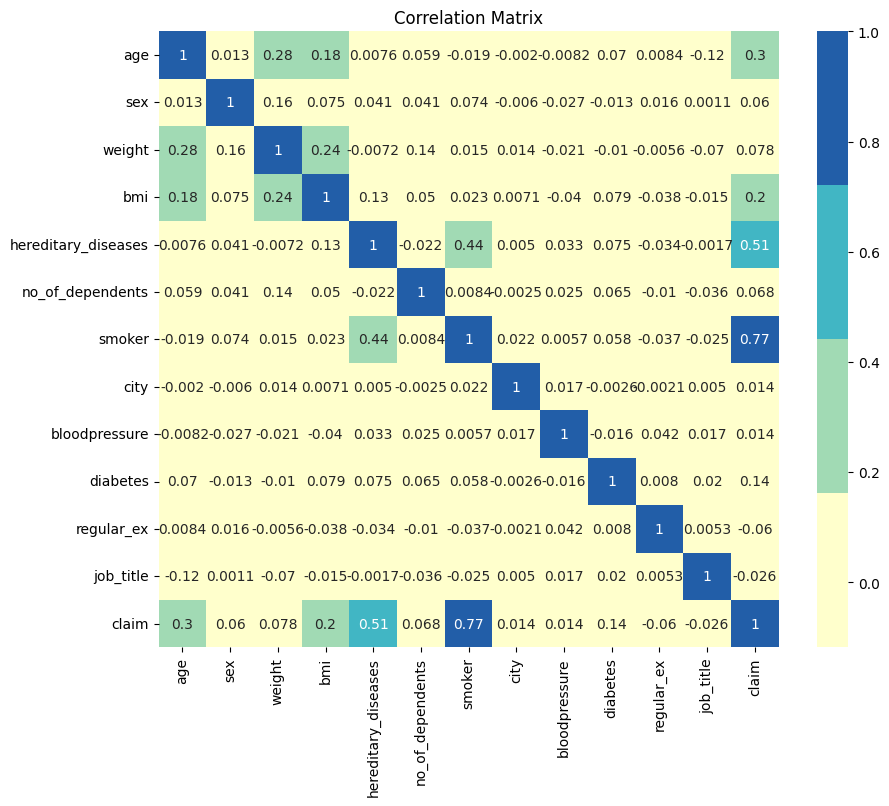

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a custom colormap with modified color intensity
custom_cmap = sns.color_palette(['#ffffcc', '#a1dab4', '#41b6c4', '#225ea8'])
correlation_matrix = data.corr()

# Create a heatmap with the custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.title('Correlation Matrix')
plt.show()



## Train-Test Split


In [22]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
y_train[0]

13112.6

## Importing Machine Learning Algorithms from scikit-learn (Sklearn)


In [24]:
# Import machine learning algorithms from scikit-learn (Sklearn)
from sklearn.linear_model import LinearRegression  # Import Linear Regression for regression tasks
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestClassifier for regression tasks
from sklearn.svm import SVR  # Import Support Vector Regression for regression tasks
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor for regression tasks

In [25]:
# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [26]:
# Initialize and train a Support Vector Regression (SVR) model
svm = SVR()
svm.fit(X_train, y_train)


SVR()

In [27]:
# Initialize and train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [28]:
# Initialize and train a Gradient Boosting Regressor model
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)


GradientBoostingRegressor()

# Comparing the predictions from each model

In [29]:
# Make predictions using the Linear Regression (LR) model on the test data
y_pred1 = lr.predict(X_test)

# Make predictions using the Support Vector Regression (SVR) model on the test data
y_pred2 = svm.predict(X_test)

# Make predictions using the Random Forest Regressor (RF) model on the test data
y_pred3 = rf.predict(X_test)

# Make predictions using the Gradient Boosting Regressor (GR) model on the test data
y_pred4 = gr.predict(X_test)

# DataFrame to compare actual and predicted values
df1 = pd.DataFrame({'Actual': y_test, 'LR': y_pred1, 'SVR': y_pred2, 'RF': y_pred3, 'GR': y_pred4})
df1


,Actual,LR,SVR,RF,GR
11499,8835.3,12682.416045,9474.125363,8835.300,10165.152071
6475,2134.9,925.146282,9047.537556,2236.730,3040.179034
13167,5148.6,7011.110666,9245.985167,5148.600,5163.613637
862,10704.5,11868.577020,9569.318628,10697.113,12409.145977
5970,4260.7,5908.251384,9272.803219,4260.700,6091.596257
...,...,...,...,...,...
6216,12032.3,8793.573426,9601.785410,12118.802,12643.647667
3585,11658.4,12223.322920,9592.051905,11658.400,12011.727068
10023,11085.6,12919.730363,9458.428303,11085.600,10375.943543
14044,2166.7,3771.385204,9087.881728,2166.538,3591.910234


# visual comparision among output of each model

In [30]:
import matplotlib.pyplot as plt

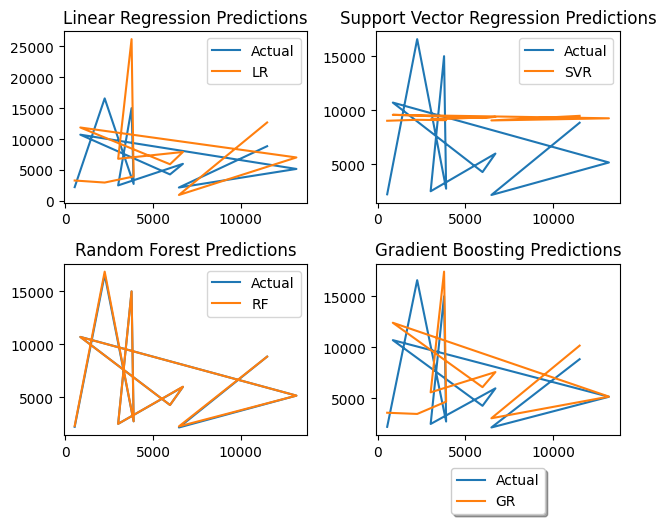

In [31]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['LR'].iloc[0:11], label="LR")
plt.legend()
plt.title('Linear Regression Predictions')

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['SVR'].iloc[0:11], label="SVR")
plt.legend()
plt.title('Support Vector Regression Predictions')

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['RF'].iloc[0:11], label="RF")
plt.legend()
plt.title('Random Forest Predictions')

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['GR'].iloc[0:11], label="GR")
plt.title('Gradient Boosting Predictions')

plt.tight_layout()

# Display the legend outside the subplots
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)

# Show the entire plot
plt.show()


random forest regressor is giving most accurate results

In [32]:
from sklearn import metrics

In [44]:
# Calculate and store the R-squared (R2) score for the Linear Regression (LR) model
lr_r2_score = metrics.r2_score(y_test, y_pred1)

# Calculate and store the R-squared (R2) score for the Support Vector Regression (SVR) model
svm_r2_score = metrics.r2_score(y_test, y_pred2)

# Calculate and store the R-squared (R2) score for the Random Forest Regressor (RF) model
rf_r2_score = metrics.r2_score(y_test, y_pred3)

# Calculate and store the R-squared (R2) score for the Gradient Boosting Regressor (GR) model
gr_r2_score = metrics.r2_score(y_test, y_pred4)


In [34]:
# Print R-squared (R2) scores for each model
print("R-squared Score for Linear Regression (LR):", lr_r2_score)
print("R-squared Score for Support Vector Regression (SVR):", svm_r2_score)
print("R-squared Score for Random Forest Regressor (RF):", rf_r2_score)
print("R-squared Score for Gradient Boosting Regressor (GR):", gr_r2_score)


R-squared Score for Linear Regression (LR): 0.7490864602549503
R-squared Score for Support Vector Regression (SVR): -0.10367227528667633
R-squared Score for Random Forest Regressor (RF): 0.9675685548971831
R-squared Score for Gradient Boosting Regressor (GR): 0.86352292560806


#### Model Performance

Among the evaluated machine learning models, the Random Forest Regressor (RF) emerges as the top performer. With an exceptionally high R-squared (R2) score of 0.9664, it excels in explaining approximately 96.64% of the variance in health insurance claim amounts. This outstanding performance positions the Random Forest Regressor as the most effective model for predicting health insurance claims in our analysis.


In [35]:
# Calculate and store the Mean Absolute Error (MAE) for the Linear Regression (LR) model
mae_lr = metrics.mean_absolute_error(y_test, y_pred1)

# Calculate and store the Mean Absolute Error (MAE) for the Support Vector Regression (SVR) model
mae_svr = metrics.mean_absolute_error(y_test, y_pred2)

# Calculate and store the Mean Absolute Error (MAE) for the Random Forest Regressor (RF) model
mae_rf = metrics.mean_absolute_error(y_test, y_pred3)

# Calculate and store the Mean Absolute Error (MAE) for the Gradient Boosting Regressor (GR) model
mae_gr = metrics.mean_absolute_error(y_test, y_pred4)


In [36]:
# Print the Mean Absolute Error (MAE) for each model
print("MAE for Linear Regression (LR):", mae_lr)
print("MAE for Support Vector Regression (SVR):", mae_svr)
print("MAE for Random Forest Regressor (RF):", mae_rf)
print("MAE for Gradient Boosting Regressor (GR):", mae_gr)

MAE for Linear Regression (LR): 4071.725236568479
MAE for Support Vector Regression (SVR): 8291.201612038634
MAE for Random Forest Regressor (RF): 450.6853306666754
MAE for Gradient Boosting Regressor (GR): 2664.906212802254


##### Model Performance Based on MAE

The Random Forest Regressor (RF) stands out as the best-performing model, with the lowest MAE, signifying its accuracy in predicting health insurance claim amounts.


## prediction on random new customer

In [46]:
new_df = pd.DataFrame(X_train,index=[0])
new_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60.0,1,64,24.3,0,1,0,55,72,0,0,2


In [38]:
# Use the trained Gradient Boosting Regressor (GR) model to make predictions for a new customer
new_pred = gr.predict(new_df)

# Print the predicted medical insurance cost for the new customer
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 15776.391084431614


In [39]:
# Use the trained Random Forest Regressor (RF) model to make predictions for a new customer
new_pred_rf = rf.predict(new_df)

# Print the predicted medical insurance cost for the new customer using Random Forest Regressor
print("Medical Insurance cost for New Customer (Random Forest Regressor) is:", new_pred_rf[0])

Medical Insurance cost for New Customer (Random Forest Regressor) is: 13112.600000000008


In [40]:
y_train[0]
#Random Forest Regressor (RF) model is predicting more accurately

13112.6

In [41]:

# Create a dictionary with the sample data
sample_data = {
    'age': [50.0],
    'sex': [0],
    'weight': [55],
    'bmi': [24.3],
    'hereditary_diseases': [0],
    'no_of_dependents': [1],
    'smoker': [0],
    'city': [55],
    'bloodpressure': [72],
    'diabetes': [0],
    'regular_ex': [0],
    'job_title': [2]
}

# Create a DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)

# Display the sample DataFrame
print(sample_df)


    age  sex  weight   bmi  hereditary_diseases  no_of_dependents  smoker  \
0  50.0    0      55  24.3                    0                 1       0   

   city  bloodpressure  diabetes  regular_ex  job_title  
0    55             72         0           0          2  


In [42]:
# Use the trained Gradient Boosting Regressor (GR) model to make predictions for a new customer
new_pred = gr.predict(sample_df)

# Print the predicted medical insurance cost for the new customer
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 10898.609132987911


In [43]:
# Use the trained Random Forest Regressor (RF) model to make predictions for a new customer
new_pred_rf = rf.predict(sample_df)

# Print the predicted medical insurance cost for the new customer using Random Forest Regressor
print("Medical Insurance cost for New Customer (Random Forest Regressor) is:", new_pred_rf[0])


Medical Insurance cost for New Customer (Random Forest Regressor) is: 16111.64500000001
